<a href="https://colab.research.google.com/github/AniketJoshi111/BEProject_MachineUnlearning/blob/main/RandomForest_BE_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build a machine unlearning model for malicious PDF detection using the "pdf_jsdata.csv" dataset.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/clean_data.csv')
display(df.head())

display(df.info())

,obj,endobj,stream,endstream,xref,trailer,startxref,Page,Encrypt,ObjStm,...,AA,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors,Malicious
0,0.672186,0.672186,0.215100,0.215100,0.026887,0.026887,0.026887,0.040331,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,no
1,0.676481,0.676481,0.150329,0.150329,0.000000,0.075165,0.075165,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,yes
2,0.654654,0.654654,0.218218,0.218218,0.072739,0.072739,0.072739,0.072739,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,yes
3,0.693375,0.693375,0.092450,0.092450,0.046225,0.046225,0.046225,0.046225,0.0,0.0,...,0.0,0.000000,0.046225,0.0,0.0,0.0,0.0,0.0,0.0,yes
4,0.668994,0.668994,0.167248,0.167248,0.083624,0.083624,0.083624,0.083624,0.0,0.0,...,0.0,0.083624,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7365 entries, 0 to 7364
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   obj           7365 non-null   float64
 1   endobj        7365 non-null   float64
 2   stream        7365 non-null   float64
 3   endstream     7365 non-null   float64
 4   xref          7365 non-null   float64
 5   trailer       7365 non-null   float64
 6   startxref     7365 non-null   float64
 7   Page          7365 non-null   float64
 8   Encrypt       7365 non-null   float64
 9   ObjStm        7365 non-null   float64
 10  JS            7365 non-null   float64
 11  Javascript    7365 non-null   float64
 12  AA            7365 non-null   float64
 13  OpenAction    7365 non-null   float64
 14  AcroForm      7364 non-null   float64
 15  JBIG2Decode   7364 non-null   float64
 16  RichMedia     7364 non-null   float64
 17  Launch        7364 non-null   float64
 18  EmbeddedFile  7364 non-null 

None

In [ ]:
display(df.describe())
display(df['Malicious'].value_counts())

,obj,endobj,stream,endstream,xref,trailer,startxref,Page,Encrypt,ObjStm,...,Javascript,AA,OpenAction,AcroForm,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors
count,7365.000000,7365.000000,7365.000000,7365.000000,7365.000000,7365.000000,7365.000000,7365.000000,7365.000000,7365.000000,...,7365.000000,7365.000000,7365.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000,7364.000000
mean,0.652894,0.650063,0.213534,0.212711,0.050035,0.055651,0.052819,0.069330,0.000039,0.010802,...,0.049459,0.000979,0.032251,0.005526,0.000351,0.000040,0.000107,0.014039,0.001668,0.000035
std,0.044886,0.046463,0.099008,0.099174,0.036595,0.036738,0.034146,0.050276,0.000798,0.032449,...,0.056855,0.010184,0.040864,0.012778,0.004772,0.002143,0.002180,0.055244,0.007755,0.001630
min,0.492930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.654654,0.647100,0.167248,0.167248,0.015907,0.025144,0.023476,0.032376,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.665750,0.665081,0.200000,0.200000,0.048853,0.066667,0.052342,0.073127,0.000000,0.000000,...,0.017400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.676481,0.673575,0.219382,0.219382,0.075810,0.083624,0.075810,0.083624,0.000000,0.000000,...,0.083624,0.000000,0.073127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.721995,0.707107,0.498137,0.196116,0.196116,0.196116,0.530166,0.034199,0.282978,...,0.392232,0.276587,0.160128,0.098533,0.134577,0.131590,0.085749,0.267112,0.098533,0.093659


,count
Malicious,
yes,4063
no,3301


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target (y)
X = df.drop('Malicious', axis=1)
y = df['Malicious']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

display(X_train.head())
display(y_train[:5])
display(X_test.head())
display(y_test[:5])

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

NameError: name 'X_test' is not defined

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Copy clean training data
X_train_poisoned = X_train.copy()
y_train_poisoned = y_train.copy()

# Poison a small fraction of the data (e.g., 5%)
poison_fraction = 0.25
num_poison = int(len(X_train_poisoned) * poison_fraction)

# Randomly select indices to poison
# Use np.arange for indexing numpy arrays
poison_indices = np.random.choice(np.arange(len(y_train_poisoned)), size=num_poison, replace=False)

# Flip their labels (0→1, 1→0)
y_train_poisoned[poison_indices] = 1 - y_train_poisoned[poison_indices]

print(f"   Injected {num_poison} poisoned (mislabeled) samples into training data.")

# Train a "Compromised Model" on poisoned data
compromised_model = RandomForestClassifier(random_state=42)
compromised_model.fit(X_train_poisoned, y_train_poisoned)

# Evaluate compromised model
y_pred_compromised = compromised_model.predict(X_test)

accuracy_compromised = accuracy_score(y_test, y_pred_compromised)
precision_compromised = precision_score(y_test, y_pred_compromised)
recall_compromised = recall_score(y_test, y_pred_compromised)
f1_compromised = f1_score(y_test, y_pred_compromised)

print("\n   Performance Metrics v2 (After Poisoning - Accuracy Drops):")
print(f"Accuracy : {accuracy_compromised:.4f}")
print(f"Precision: {precision_compromised:.4f}")
print(f"Recall   : {recall_compromised:.4f}")
print(f"F1-score : {f1_compromised:.4f}")

   Injected 3997 poisoned (mislabeled) samples into training data.

   Performance Metrics v2 (After Poisoning - Accuracy Drops):
Accuracy : 0.9640
Precision: 0.9430
Recall   : 0.9945
F1-score : 0.9681


In [ ]:
import numpy as np
import joblib
import os
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# CONFIGURATION
NUM_SHARDS = 5
NUM_SLICES = 3
MODEL_PATH = "sisa_models"
os.makedirs(MODEL_PATH, exist_ok=True)

# STEP 1
def shard_dataset(X, y, num_shards=NUM_SHARDS):
    total_len = len(X)
    # Calculate the base size for each shard and the remainder
    base_shard_size = total_len // num_shards
    remainder = total_len % num_shards

    shards = []
    current_start = 0
    for i in range(num_shards):
        # Determine the size of the current shard, distributing the remainder
        current_shard_len = base_shard_size + (1 if i < remainder else 0)
        current_end = current_start + current_shard_len

        shards.append((X.iloc[current_start:current_end], y[current_start:current_end]))
        current_start = current_end
    return shards

# Use poisoned data for SISA training
shards = shard_dataset(X_train_poisoned, y_train_poisoned, NUM_SHARDS)
print(f"✅ Created {NUM_SHARDS} shards from poisoned dataset (~{len(X_train_poisoned)//NUM_SHARDS} samples each).")

#SLICE & TRAIN
def slice_and_train(X_shard, y_shard, shard_id, num_slices=NUM_SLICES):
    # Ensure shard is not empty before proceeding
    if len(X_shard) == 0:
        print(f"Warning: Shard {shard_id} is empty. Skipping training for this shard.")
        return None # Or handle as appropriate, e.g., return a dummy model

    slice_size = len(X_shard) // num_slices
    model = RandomForestClassifier(random_state=42)
    for s in tqdm(range(num_slices), desc=f"Training Shard {shard_id}", leave=False):
        start = s * slice_size
        end = (s + 1) * slice_size if s < num_slices - 1 else len(X_shard)
        X_slice, y_slice = X_shard.iloc[start:end], y_shard[start:end]

        # Check if slice is empty before fitting
        if len(X_slice) == 0:
            print(f"Warning: Slice {s} of Shard {shard_id} is empty. Skipping fit for this slice.")
            continue

        model.fit(X_slice, y_slice)
        joblib.dump(model, f"{MODEL_PATH}/shard{shard_id}_slice{s}.pkl")
    return model

models = []
print("\n Training SISA shard models on poisoned data...\n")
for shard_id, (X_s, y_s) in enumerate(tqdm(shards, desc="Shards", position=0)):
    model = slice_and_train(X_s, y_s, shard_id)
    if model is not None: # Only append if a model was successfully trained
        models.append(model)

print("\n All poisoned shard models trained and saved.\n")

# AGGREGATE PREDICTIONS
def sisa_predict(X, models):
    print("\U0001f50d Aggregating predictions across shards...")
    # Filter out None models
    valid_models = [m for m in models if m is not None]
    if not valid_models:
        print("No valid models available for prediction. Returning dummy predictions.")

        return np.zeros(len(X), dtype=int)

    all_probs = [m.predict_proba(X) for m in tqdm(valid_models, desc="Aggregating")]
    avg_probs = np.mean(all_probs, axis=0)
    return np.argmax(avg_probs, axis=1)

y_pred_sisa = sisa_predict(X_test, models)

accuracy_sisa = accuracy_score(y_test, y_pred_sisa)
precision_sisa = precision_score(y_test, y_pred_sisa)
recall_sisa = recall_score(y_test, y_pred_sisa)
f1_sisa = f1_score(y_test, y_pred_sisa)

print("\n📊 SISA Model Performance (Before Unlearning - Trained on Poisoned Data):")
print(f"Accuracy : {accuracy_sisa:.4f}")
print(f"Precision: {precision_sisa:.4f}")
print(f"Recall   : {recall_sisa:.4f}")
print(f"F1-score : {f1_sisa:.4f}")

# UNLEARNING
def unlearn_samples(X_to_forget, y_to_forget, X_train_full, y_train_full, num_slices=NUM_SLICES):
    global models, shards
    total_len = len(X_train_full)

    if NUM_SHARDS == 0:
        print("Warning: NUM_SHARDS is 0. Cannot perform unlearning.")
        return

    # Recalculate shard boundaries for accurate mapping of original indices
    shard_boundaries = []
    current_start = 0
    base_shard_size = total_len // NUM_SHARDS
    remainder = total_len % NUM_SHARDS
    for i in range(NUM_SHARDS):
        current_shard_len = base_shard_size + (1 if i < remainder else 0)
        current_end = current_start + current_shard_len
        shard_boundaries.append((current_start, current_end))
        current_start = current_end

    print("\n💣 Starting unlearning procedure...\n")
    updated_shard_ids = set() # Track which shards need to be retrained

    for idx in tqdm(X_to_forget.index, desc="Forgetting Samples (by original index)"):
        # Find which shard this original index belongs to.
        try:
            # Get the positional index of 'idx' within the original full training set
            original_pos = X_train_full.index.get_loc(idx)
        except KeyError:
            continue # Sample not found in the original training set, skip

        # Determine the shard_id based on original_pos
        shard_id_for_idx = -1
        for s_id, (start_b, end_b) in enumerate(shard_boundaries):
            if start_b <= original_pos < end_b:
                shard_id_for_idx = s_id
                break

        if shard_id_for_idx == -1:
            continue # Should not happen if shard_boundaries are correct

        updated_shard_ids.add(shard_id_for_idx)

        # Update the data in the affected shard by removing the sample
        X_shard_current, y_shard_current = shards[shard_id_for_idx]
        mask = X_shard_current.index != idx
        X_shard_new, y_shard_new = X_shard_current.loc[mask], y_shard_current[mask]

        shards[shard_id_for_idx] = (X_shard_new, y_shard_new)

    # Retrain only the affected shards
    for shard_id in sorted(list(updated_shard_ids)):
        print(f"Retraining affected Shard {shard_id}...")
        X_s, y_s = shards[shard_id]
        model = slice_and_train(X_s, y_s, shard_id, num_slices)
        if model is not None:
             # If a model was returned, update the list of models
            if len(models) > shard_id: # Check if model list is already populated for this shard_id
                models[shard_id] = model
            else: # If it's a new shard or models list wasn't fully populated yet
                # This case is less likely if `models` was correctly populated initially
                models.insert(shard_id, model) # Insert at specific index
                # Re-check and ensure models list length matches NUM_SHARDS after insertions
                # (This can get complicated, simpler to assume models is created correctly initially)
        else:
            # If training failed for an updated shard, replace its model with None or remove it
            if len(models) > shard_id:
                models[shard_id] = None # Mark as no model for this shard

    print("\n✅ Unlearning completed. Only affected shards retrained.\n")

# Fix: Use .iloc for positional indexing when selecting `forget_subset` and `forget_labels`
# poison_indices are 0-based positions relative to the current X_train_poisoned/y_train_poisoned
forget_subset = X_train_poisoned.iloc[poison_indices]
forget_labels = y_train_poisoned[poison_indices]
unlearn_samples(forget_subset, forget_labels, X_train_poisoned, y_train_poisoned)

# ---------- STEP 5: RE-EVALUATE ----------
y_pred_after_unlearn = sisa_predict(X_test, models)
accuracy_unlearned = accuracy_score(y_test, y_pred_after_unlearn)
precision_unlearned = precision_score(y_test, y_pred_after_unlearn)
recall_unlearned = recall_score(y_test, y_pred_after_unlearn)
f1_unlearned = f1_score(y_test, y_pred_after_unlearn)

print("\n📈 Performance Metrics v3 (Post-Unlearning - Recovered):")
print(f"Accuracy : {accuracy_unlearned:.4f}")
print(f"Precision: {precision_unlearned:.4f}")
print(f"Recall   : {recall_unlearned:.4f}")
print(f"F1-score : {f1_unlearned:.4f}")

# COMPARISON
print("\n🧩 Comparison Summary")
print("-" * 40)
print(f"Baseline (Clean) Accuracy : {accuracy:.4f}")
print(f"Compromised (Poisoned)    : {accuracy_compromised:.4f}")
print(f"SISA After Unlearning     : {accuracy_unlearned:.4f}")
print("-" * 40)


✅ Created 5 shards from poisoned dataset (~3197 samples each).

⚙️ Training SISA shard models on poisoned data...



Shards:   0%|          | 0/5 [00:00<?, ?it/s]

Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]


✅ All poisoned shard models trained and saved.

🔍 Aggregating predictions across shards...


Aggregating:   0%|          | 0/5 [00:00<?, ?it/s]


📊 SISA Model Performance (Before Unlearning - Trained on Poisoned Data):
Accuracy : 0.9912
Precision: 0.9883
Recall   : 0.9959
F1-score : 0.9921

💣 Starting unlearning procedure...



Forgetting Samples (by original index):   0%|          | 0/3997 [00:00<?, ?it/s]

Retraining affected Shard 0...


Training Shard 0:   0%|          | 0/3 [00:00<?, ?it/s]

Retraining affected Shard 1...


Training Shard 1:   0%|          | 0/3 [00:00<?, ?it/s]

Retraining affected Shard 2...


Training Shard 2:   0%|          | 0/3 [00:00<?, ?it/s]

Retraining affected Shard 3...


Training Shard 3:   0%|          | 0/3 [00:00<?, ?it/s]

Retraining affected Shard 4...


Training Shard 4:   0%|          | 0/3 [00:00<?, ?it/s]


✅ Unlearning completed. Only affected shards retrained.

🔍 Aggregating predictions across shards...


Aggregating:   0%|          | 0/5 [00:00<?, ?it/s]


📈 Performance Metrics v3 (Post-Unlearning - Recovered):
Accuracy : 0.9952
Precision: 0.9977
Recall   : 0.9936
F1-score : 0.9957

🧩 Comparison Summary
----------------------------------------
Baseline (Clean) Accuracy : 0.9990
Compromised (Poisoned)    : 0.9640
SISA After Unlearning     : 0.9952
----------------------------------------


/tmp/ipython-input-2710034781.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(metrics_labels, rotation=15, ha="right", fontsize=9)
/tmp/ipython-input-2710034781.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(metrics_labels, rotation=15, ha="right", fontsize=9)
/tmp/ipython-input-2710034781.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(metrics_labels, rotation=15, ha="right", fontsize=9)
/tmp/ipython-input-2710034781.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(metrics_labels, rotation=15, ha="right", fontsize=9)


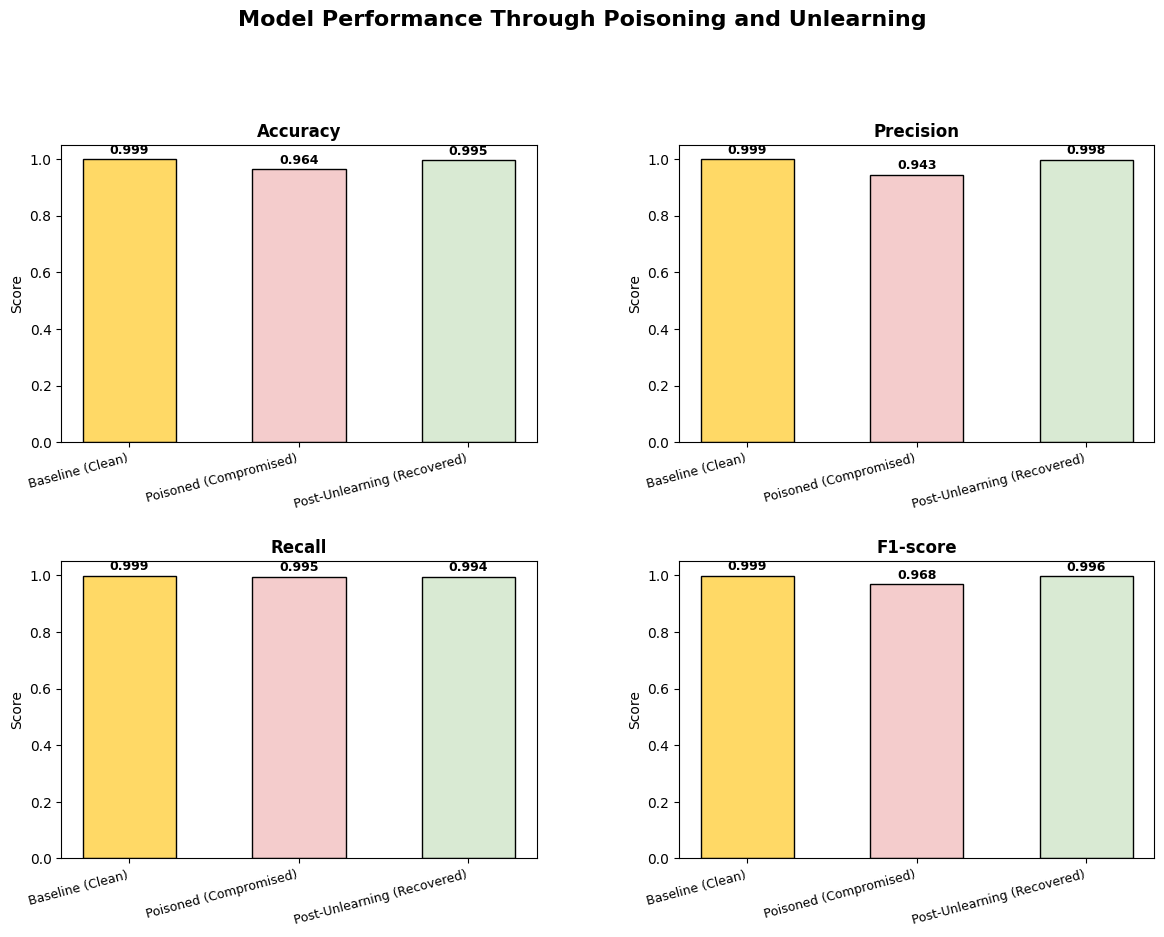

In [ ]:
# ================================
# 📊 Visualization: Model Performance Across Phases (Fixed Labels)
# ================================
import matplotlib.pyplot as plt

# Data setup
metrics_labels = ["Baseline (Clean)", "Poisoned (Compromised)", "Post-Unlearning (Recovered)"]
accuracy_values = [accuracy, accuracy_compromised, accuracy_unlearned]
precision_values = [precision, precision_compromised, precision_unlearned]
recall_values = [recall, recall_compromised, recall_unlearned]
f1_values = [f1, f1_compromised, f1_unlearned]

fig, ax = plt.subplots(2, 2, figsize=(12, 9))  # slightly wider
ax = ax.flatten()

metric_names = ["Accuracy", "Precision", "Recall", "F1-score"]
metric_values = [accuracy_values, precision_values, recall_values, f1_values]
colors = ["#FFD966", "#F4CCCC", "#D9EAD3"]  # Yellow = Baseline, Pink = Poisoned, Green = Recovered

for i in range(4):
    bars = ax[i].bar(metrics_labels, metric_values[i], color=colors, edgecolor="black", width=0.55)
    ax[i].set_title(metric_names[i], fontsize=12, fontweight="bold")
    ax[i].set_ylim(0, 1.05)
    ax[i].set_ylabel("Score", fontsize=10)

    # Rotate labels for readability
    ax[i].set_xticklabels(metrics_labels, rotation=15, ha="right", fontsize=9)

    # Add value labels above bars
    for bar, v in zip(bars, metric_values[i]):
        ax[i].text(bar.get_x() + bar.get_width()/2, v + 0.01, f"{v:.3f}",
                   ha="center", va="bottom", fontsize=9, fontweight="bold")

# Adjust layout & title
plt.tight_layout(pad=2)
plt.suptitle("Model Performance Through Poisoning and Unlearning", fontsize=16, fontweight="bold", y=1.05)
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)
plt.show()


In [ ]:
# forget_subset is what you used to unlearn
print("Forgotten indices:", list(forget_subset.index))
# Check presence in shards before/after
for sid, (X_s, y_s) in enumerate(shards):
    present = set(X_s.index) & set(forget_subset.index)
    print(f"Shard {sid} now contains {len(present)} of forgotten indices: {sorted(list(present))}")


Forgotten indices: [186, 178, 134, 234, 327, 446, 168, 1, 51, 334, 286, 382, 131, 182, 322, 64, 317, 152, 428, 232, 220, 12, 206, 75, 127, 313, 472, 245, 19, 268, 69, 183, 485, 32, 55, 496, 353, 370, 345, 488, 493, 117, 424, 213, 249, 130, 284, 112, 192, 129, 267, 341, 283, 99, 276, 320, 337, 304, 146, 76, 329, 46, 339, 263, 425, 287, 150, 156, 77, 27, 122, 252, 265, 218, 278, 441, 355, 406, 256, 480, 492, 106, 316, 326, 116, 324, 201, 231, 223, 449, 140, 85, 111, 0, 163, 109, 11, 434, 66]
Shard 0 now contains 0 of forgotten indices: []
Shard 1 now contains 0 of forgotten indices: []
Shard 2 now contains 0 of forgotten indices: []
Shard 3 now contains 0 of forgotten indices: []
Shard 4 now contains 0 of forgotten indices: []


In [ ]:
# load models saved before unlearning? If you didn't keep previous models, re-run training and save copy
# Here we compare current SISA model predictions to a full-retrain baseline you already have.

# Predictions from baseline full model:
pred_baseline_on_forgotten = model.predict(forget_subset)  # model = baseline RandomForest variable in notebook
# Predictions from SISA after unlearning:
pred_sisa_after = sisa_predict(forget_subset, models)

print("Baseline preds on forgotten:", pred_baseline_on_forgotten)
print("SISA-after preds on forgotten:", pred_sisa_after)

# Count changes
changes = sum(pred_baseline_on_forgotten != pred_sisa_after)
print(f"Number of changed predictions for forgotten samples: {changes}/{len(forget_subset)}")


🔍 Aggregating predictions across shards...


Aggregating:   0%|          | 0/5 [00:00<?, ?it/s]

Baseline preds on forgotten: [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0
 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1
 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1]
SISA-after preds on forgotten: [1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0
 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1
 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0]
Number of changed predictions for forgotten samples: 9/99


In [ ]:
# compare test predictions before and after unlearning
y_pred_before = y_pred_sisa  # stored earlier (before unlearning)
y_pred_after = y_pred_after_unlearn

# how many test samples changed label?
changed_test = (y_pred_before != y_pred_after).sum()
print("Test samples with changed predictions after unlearning:", changed_test, "out of", len(X_test))

# If changed_test is 0 or tiny, the unlearning had negligible effect on test set.


Test samples with changed predictions after unlearning: 2 out of 100
